In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Bidirectional,LSTM,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
tokenizer = Tokenizer()

In [0]:
data = "In the town of Athy one Jeremy Lanigan \n Battered away 'til he hadn't a pound. \n His father he died and made him a man again \n Left him a farm and ten acres of ground. \n He gave a grand party to friends and relations \n Who didn't forget him when it comes to the will, \n If you'll but listen I'll make your eyes glisten \n Of the rows and the ructions of Lanigan's Ball.\n  Myself to be sure got free invitation, \n For all the nice girls and boys I might ask, \n And just in a minute both friends and relations \n Were dancing 'round merry as bees 'round a cask. \n Judy O'Daly, that nice little milliner, \n She tipped me a wink for to give her a call, \n And I soon arrived with Peggy McGilligan \n Just in time for Lanigan's Ball.\n There were lashings of punch and wine for the ladies, \n Potatoes and cakes; there was bacon and tea, \n There were the Nolans, Dolans, O'Gradys \n Courting the girls and dancing away. \n Songs they went 'round as plenty as water,  \n The harp that once sounded in Tara's old hall, \n Sweet Nelly Gray and The Rat Catcher's Daughter, \n All singing together at Lanigan's Ball. \n They were doing all kinds of nonsensical polkas \n All 'round the room in a whirligig. \n Julia and I, we banished their nonsense \n And tipped them the twist of a reel and a jig. \n &'Och mavrone, how the girls got all mad at me \n Danced 'til you'd think the ceiling would fall. \n For I spent three weeks at Brooks' Academy \n Learning new steps for Lanigan's Ball. \n She stepped out and I stepped in again, \n I stepped out and she stepped in again, \n She stepped out and I stepped in again, \n Learning new steps for Lanigan's Ball. \n Boys were all merry and the girls they were hearty \n And danced all around in couples and groups, \n 'Til an accident happened, young Terrance McCarthy \n Put his right leg through Miss Finnerty's hoops. \n Poor creature fainted and cried, ``Meelia murther, \n Called for her brothers and gathered them all. \n Carmody swore that he'd go no further \n Til he had satisfaction at Lanigan's Ball. \n In the midst of the row miss Kerrigan fainted, \n Her cheeks at the same time as red as a rose. \n Some of the lads declared she was painted, \n She took a small drop too much, I suppose. \n Her sweetheart, Ned Morgan, so powerful and able, \n When he saw his fair colleen stretched out by the wall, \n Tore the left leg from under the table \n And smashed all the Chaneys at Lanigan's Ball. \n Boys, oh boys, 'twas then there were runctions. \n Myself got a lick from big Phelim McHugh. \n I soon replied to his introduction \n And kicked up a terrible hullabaloo. \n Ould Casey, the piper, was near being strangled. \n They squeezed up his pipes, bellows, chanters and all. \n The girls, in their ribbons, they got all entangled \n And that put an end to Lanigan's Ball."

In [0]:
c = data.lower().split("\n")

In [0]:
tokenizer.fit_on_texts(c)

In [0]:
total_word = len(tokenizer.word_index) + 1

In [0]:
print(tokenizer.word_index)
print(total_word)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'of': 6, 'i': 7, "lanigan's": 8, 'ball': 9, 'for': 10, 'were': 11, 'to': 12, 'she': 13, 'at': 14, 'stepped': 15, 'he': 16, 'his': 17, 'girls': 18, 'as': 19, 'they': 20, 'again': 21, 'got': 22, 'boys': 23, "'round": 24, 'that': 25, 'her': 26, 'there': 27, 'out': 28, "'til": 29, 'him': 30, 'was': 31, 'away': 32, 'left': 33, 'friends': 34, 'relations': 35, 'when': 36, 'myself': 37, 'nice': 38, 'just': 39, 'dancing': 40, 'merry': 41, 'tipped': 42, 'me': 43, 'soon': 44, 'time': 45, 'their': 46, 'them': 47, 'danced': 48, 'learning': 49, 'new': 50, 'steps': 51, 'an': 52, 'put': 53, 'leg': 54, 'miss': 55, 'fainted': 56, 'from': 57, 'up': 58, 'town': 59, 'athy': 60, 'one': 61, 'jeremy': 62, 'lanigan': 63, 'battered': 64, "hadn't": 65, 'pound': 66, 'father': 67, 'died': 68, 'made': 69, 'man': 70, 'farm': 71, 'ten': 72, 'acres': 73, 'ground': 74, 'gave': 75, 'grand': 76, 'party': 77, 'who': 78, "didn't": 79, 'forget': 80, 'it': 81, 'comes': 82, 'wil

In [0]:
input_sequences = []
for i in c:
  token_list = tokenizer.texts_to_sequences([i])[0]
  for j in range(1,len(token_list)):
    n_gram_sequence = token_list[:j+1]
    input_sequences.append(n_gram_sequence)

In [0]:
max_sequence_length = max([len(x) for x in input_sequences])

In [0]:
max_sequence_length

11

In [0]:
input_padd_sequence = np.array(pad_sequences(input_sequences,maxlen=max_sequence_length,padding="pre"))

In [0]:
input_padd_sequence.shape

(428, 11)

In [0]:
xs,label = input_padd_sequence[:,:-1],input_padd_sequence[:,-1]

In [0]:
ys = tf.keras.utils.to_categorical(label,num_classes=total_word)

In [0]:
print(tokenizer.word_index["in"])
print(tokenizer.word_index["the"])
print(tokenizer.word_index["town"])
print(tokenizer.word_index["of"])
print(tokenizer.word_index["athy"])
print(tokenizer.word_index["one"])
print(tokenizer.word_index["jeremy"])
print(tokenizer.word_index["lanigan"])

4
2
59
6
60
61
62
63


In [0]:
print(xs[6])

[ 0  0  0  4  2 59  6 60 61 62]


In [0]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 59  6 60 61]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'of': 6, 'i': 7, "lanigan's": 8, 'ball': 9, 'for': 10, 'were': 11, 'to': 12, 'she': 13, 'at': 14, 'stepped': 15, 'he': 16, 'his': 17, 'girls': 18, 'as': 19, 'they': 20, 'again': 21, 'got': 22, 'boys': 23, "'round": 24, 'that': 25, 'her': 26, 'there': 27, 'out': 28, "'til": 29, 'him': 30, 'was': 31, 'away': 32, 'left': 33, 'friends': 34, 'relations': 35, 'when': 36, 'myself': 37, 'nice': 38, 'just': 39, 'dancing': 40, 'merry': 41, 'tipped': 42, 'me': 43, 'soon': 44, 'time': 45, 'their': 46, 'them': 47, 'danced': 48, 'learning': 49, 'new': 50, 'steps': 51, 'an': 52, 'put': 53, 'leg': 54, 'miss': 55, 'fainted': 56, 'from': 57, 'up': 58, 'town': 59, 'athy': 60, 'one': 61, 'jeremy': 62, 'lanigan': 63, 'battered': 64, "hadn't": 65, 'pound': 66, 'father': 67, 'died': 68, 'made': 69, 'man': 70, 'farm': 71, 'ten': 72, 'acres': 73, 'ground': 74, 'gave': 75, 'grand': 76, 'party': 77, 'who': 78, "didn't": 79, 'forget': 80, 'it': 81, 'comes': 82, 'wil

In [0]:
model = Sequential()

In [0]:
model.add(Embedding(total_word,64,input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_word,activation="softmax"))

In [0]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
history = model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
428/428 [==============================] - 2s 5ms/sample - loss: 5.5672 - acc: 0.0374
Epoch 2/500
428/428 [==============================] - 1s 1ms/sample - loss: 5.5412 - acc: 0.0537
Epoch 3/500
428/428 [==============================] - 1s 1ms/sample - loss: 5.4861 - acc: 0.0537
Epoch 4/500
428/428 [==============================] - 1s 1ms/sample - loss: 5.3612 - acc: 0.0537
Epoch 5/500
428/428 [==============================] - 0s 1ms/sample - loss: 5.1704 - acc: 0.0537
Epoch 6/500
428/428 [==============================] - 1s 1ms/sample - loss: 5.0756 - acc: 0.0537
Epoch 7/500
428/428 [==============================] - 0s 1ms/sample - loss: 5.0367 - acc: 0.0537
Epoch 8/500
428/428 [==============================] - 0s 1ms/sample - loss: 5.0002 - acc: 0.0607
Epoch 9/500
428/428 [==============================] - 1s 1ms/sample - loss: 4.9666 - acc: 0.0514
Epoch 10/500
428/428 [==============================] - 1s 1ms/sample - loss: 4.9272 - acc: 0.0701
Epoch 11/500
428/42

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

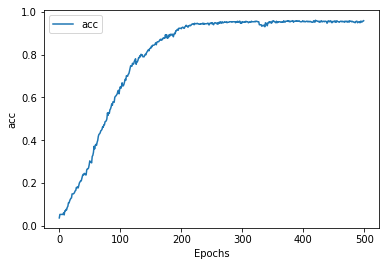

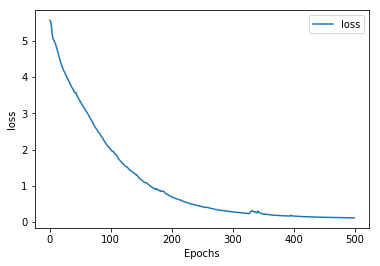

In [0]:
plot_graphs(history,"acc")
plot_graphs(history,"loss")

In [1]:
seed_text = "Laurence went to dublin"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_length-1,padding="pre")
  predict = model.predict_classes(token_list,verbose=0)
  output_word= ""
  
  for word,index in tokenizer.word_index.items():
    if index == predict:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

NameError: ignored